# Analysis of COLLEGESCORECARD dataset 
The College Scorecard dataset is an aggregation of data about post-secondary educational institutions collected and provided by the United States' Department of Education. The dataset contains data about the given institution, its students, and its costs. This data includes but is not limited to: location, fields of study offered, acceptance rates, graduation rates, loan information, etc. there are too many to be listed here. Access the current dataset [here](https://data.ed.gov/dataset/college-scorecard-all-data-files-through-6-2020/resources).


# What if I was getting ready to enter college in next few years?
Picking a school is hard. Especially when there are so many to choose from. It is important to be able to narrow down all the choices.

To demonstrate this I am going to put myself in that student's shoes. And imagine that I am a high school student considering which colleges I should apply to. 

I live in Baltimore County, MD and will consider colleges in my state and other nearby states. I will focus on tuition costs and other incidental costs (books, housing, etc.), as well as locations (urban, suburban, rural), SAT requirements, and admission, retention, and graduation rates, for four year institutions.

In [49]:
import pandas as pd
# these options allow for better viewability of data when performing EDA in jupyter notebook
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', df.shape[1]+1)


file = '.\data\Most-Recent-Cohorts-All-Data-Elements.csv'

df = pd.read_csv(file, low_memory=False)

In [ ]:
df.shape

(6694, 2392)

### Whoa! That's a lot of data!
It looks like there are more than six and half thousand schools with nearly two and a half thousand features! let's see what it looks like.

In [9]:
df.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,FEDSCHCD,BOOKSUPPLY,ROOMBOARD_ON,OTHEREXPENSE_ON,ROOMBOARD_OFF,OTHEREXPENSE_OFF,OTHEREXPENSE_FAM,ENDOWBEGIN,ENDOWEND,DOLPROVIDER
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,001002,1600.0,9240.0,3090.0,9240.0,3090.0,3090.0,NaN,NaN,0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu/,https://uab.studentaidcalculator.com/survey.aspx,...,001052,1200.0,12307.0,5555.0,12307.0,5555.0,5555.0,524675419.0,537349307.0,0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu/,www2.amridgeuniversity.edu:9091/,...,016885,900.0,NaN,NaN,9600.0,1600.0,1600.0,174804.0,174805.0,0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu/,finaid.uah.edu/,...,001055,2120.0,10400.0,3994.0,10400.0,3994.0,3994.0,79465021.0,77250279.0,1
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,001005,1600.0,6050.0,3392.0,7320.0,4228.0,4228.0,99638681.0,94536751.0,0


### To get a better idea of what just the features are here are just the columns, all 2,392 of them.

In [13]:
for col in df.columns:
    print (col)

UNITID
OPEID
OPEID6
INSTNM
CITY
STABBR
ZIP
ACCREDAGENCY
INSTURL
NPCURL
SCH_DEG
HCM2
MAIN
NUMBRANCH
PREDDEG
HIGHDEG
CONTROL
ST_FIPS
REGION
LOCALE
LOCALE2
LATITUDE
LONGITUDE
CCBASIC
CCUGPROF
CCSIZSET
HBCU
PBI
ANNHI
TRIBAL
AANAPII
HSI
NANTI
MENONLY
WOMENONLY
RELAFFIL
ADM_RATE
ADM_RATE_ALL
SATVR25
SATVR75
SATMT25
SATMT75
SATWR25
SATWR75
SATVRMID
SATMTMID
SATWRMID
ACTCM25
ACTCM75
ACTEN25
ACTEN75
ACTMT25
ACTMT75
ACTWR25
ACTWR75
ACTCMMID
ACTENMID
ACTMTMID
ACTWRMID
SAT_AVG
SAT_AVG_ALL
PCIP01
PCIP03
PCIP04
PCIP05
PCIP09
PCIP10
PCIP11
PCIP12
PCIP13
PCIP14
PCIP15
PCIP16
PCIP19
PCIP22
PCIP23
PCIP24
PCIP25
PCIP26
PCIP27
PCIP29
PCIP30
PCIP31
PCIP38
PCIP39
PCIP40
PCIP41
PCIP42
PCIP43
PCIP44
PCIP45
PCIP46
PCIP47
PCIP48
PCIP49
PCIP50
PCIP51
PCIP52
PCIP54
CIP01CERT1
CIP01CERT2
CIP01ASSOC
CIP01CERT4
CIP01BACHL
CIP03CERT1
CIP03CERT2
CIP03ASSOC
CIP03CERT4
CIP03BACHL
CIP04CERT1
CIP04CERT2
CIP04ASSOC
CIP04CERT4
CIP04BACHL
CIP05CERT1
CIP05CERT2
CIP05ASSOC
CIP05CERT4
CIP05BACHL
CIP09CERT1
CIP09CERT2
CIP09ASSOC

## Dictionary of features used
### These are taken from definitions provided by Department of Education for all the features in its dataset. 
The original document can be found [here](https://data.ed.gov/dataset/college-scorecard-all-data-files-through-6-2020/resources?resource=658b5b83-ac9f-4e41-913e-9ba9411d7967). 

I went through the dictionary and narrowed down the features that are relevant to my search.  See the features and their definitions below.

[INSTNM] - Institution name

[CITY] - City

[STABBR] - State postcode

[PREDDEG] - Predominant undergraduate degree awarded 
```   
    0	Not classified
    1	Predominantly certificate-degree granting
    2	Predominantly associate's-degree granting
    3	Predominantly bachelor's-degree granting
    4	Entirely graduate-degree granting
```
[LOCALE] - Locale of institution	
```
    11	City: Large (population of 250,000 or more)
    12	City: Midsize (population of at least 100,000 but less than 250,000)
    13	City: Small (population less than 100,000)
    21	Suburb: Large (outside principal city, in urbanized area with population of 250,000 or more)
    22	Suburb: Midsize (outside principal city, in urbanized area with population of at least 100,000 but less than 250,000)
    23	Suburb: Small (outside principal city, in urbanized area with population less than 100,000)
    31	Town: Fringe (in urban cluster up to 10 miles from an urbanized area)
    32	Town: Distant (in urban cluster more than 10 miles and up to 35 miles from an urbanized area)
    33	Town: Remote (in urban cluster more than 35 miles from an urbanized area)
    41	Rural: Fringe (rural territory up to 5 miles from an urbanized area or up to 2.5 miles from an urban cluster)
    42	Rural: Distant (rural territory more than 5 miles but up to 25 miles from an urbanized area or more than 2.5 and up to 10 miles from an urban cluster)
    43	Rural: Remote (rural territory more than 25 miles from an urbanized area and more than 10 miles from an urban cluster)
```
[ADM_RATE] - Admission rate

[SATVR75] - 75th percentile of SAT scores at the institution (critical reading)

[SATMT75] - 75th percentile of SAT scores at the institution (math)

[UGDS] - Enrollment of undergraduate certificate/degree-seeking students

[TUITIONFEE_IN] - In-state tuition and fees

[TUITIONFEE_OUT] - Out-of-state tuition and fees

[C150_4] - Completion rate for first-time, full-time students at four-year institutions (150% of expected time to completion)

[RET_FT4] - First-time, full-time student retention rate at four-year institutions

[C100_4] - Completion rate for first-time, full-time students at four-year institutions (100% of expected time to completion)

[ICLEVEL] - Level of institution
```    
    1	4-year
    2	2-year
    3	Less-than-2-year
```
[BOOKSUPPLY] - Cost of attendance: estimated books and supplies

[ROOMBOARD_ON] - Cost of attendance: on-campus room and board

[OTHEREXPENSE_ON] - Cost of attendance: on-campus other expenses

[ROOMBOARD_OFF] - Cost of attendance: off-campus room and board

[OTHEREXPENSE_OFF] - Cost of attendance: off-campus other expenses

In [79]:
features = ['INSTNM', 'CITY', 'STABBR', 'PREDDEG', 'LOCALE', 'ADM_RATE', 'SATVR75', 'SATMT75', 'UGDS', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'C150_4', 'RET_FT4', 'C100_4', 'ICLEVEL', 'BOOKSUPPLY', 'ROOMBOARD_ON', 'OTHEREXPENSE_ON', 'ROOMBOARD_OFF', 'OTHEREXPENSE_OFF']

In [104]:
pd.set_option('display.max_rows', 30)
df_features = df[features]
df_features     

,INSTNM,CITY,STABBR,PREDDEG,LOCALE,ADM_RATE,SATVR75,SATMT75,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,C150_4,RET_FT4,C100_4,ICLEVEL,BOOKSUPPLY,ROOMBOARD_ON,OTHEREXPENSE_ON,ROOMBOARD_OFF,OTHEREXPENSE_OFF
0,Alabama A & M University,Normal,AL,3,12.0,0.9175,510.0,500.0,5271.0,10024.0,18634.0,0.2974,0.5689,0.0797,1,1600.0,9240.0,3090.0,9240.0,3090.0
1,University of Alabama at Birmingham,Birmingham,AL,3,12.0,0.7366,680.0,685.0,13328.0,8568.0,20400.0,0.6340,0.8310,0.4023,1,1200.0,12307.0,5555.0,12307.0,5555.0
2,Amridge University,Montgomery,AL,2,12.0,NaN,NaN,NaN,365.0,6950.0,6950.0,0.3333,NaN,0.5000,1,900.0,NaN,NaN,9600.0,1600.0
3,University of Alabama in Huntsville,Huntsville,AL,3,12.0,0.8257,720.0,770.0,7785.0,11122.0,23518.0,0.5768,0.8291,0.2696,1,2120.0,10400.0,3994.0,10400.0,3994.0
4,Alabama State University,Montgomery,AL,3,12.0,0.9690,510.0,510.0,3750.0,11068.0,19396.0,0.3276,0.6127,0.1648,1,1600.0,6050.0,3392.0,7320.0,4228.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6689,Georgia Military College - Eastman,Eastman,GA,0,NaN,NaN,NaN,NaN,NaN,6165.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
6690,American College of Barbering - Florence,Florence,KY,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN
6691,HCI College - Fort Lauderdale Campus,Fort Lauderdale,FL,0,NaN,NaN,NaN,NaN,NaN,19404.0,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
6692,ABC Adult School - Cabrillo Lane,Cerritos,CA,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN


That handles all the columns we had to deal with. Next we need to pare down the the rows. My first step is to create new dataframe which will only include 4-year institution based on ICLEVEL and PREDDEG features.

ICLEVEL - indicates 4 year instituions which can include professional schools (Medical, Dental, Law)
PREDDEG - indicates the predominant degree awarded, if it mostly awards graduate degrees it is better to leave it out because we are targeting our data for undergraduate programs.

In [281]:
df_4yr = df_features.loc[(df_features['ICLEVEL'] == 1) & (df_features['PREDDEG'] == 3)]
df_4yr

,INSTNM,CITY,STABBR,PREDDEG,LOCALE,ADM_RATE,SATVR75,SATMT75,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,C150_4,RET_FT4,C100_4,ICLEVEL,BOOKSUPPLY,ROOMBOARD_ON,OTHEREXPENSE_ON,ROOMBOARD_OFF,OTHEREXPENSE_OFF
0,Alabama A & M University,Normal,AL,3,12.0,0.9175,510.0,500.0,5271.0,10024.0,18634.0,0.2974,0.5689,0.0797,1,1600.0,9240.0,3090.0,9240.0,3090.0
1,University of Alabama at Birmingham,Birmingham,AL,3,12.0,0.7366,680.0,685.0,13328.0,8568.0,20400.0,0.6340,0.8310,0.4023,1,1200.0,12307.0,5555.0,12307.0,5555.0
3,University of Alabama in Huntsville,Huntsville,AL,3,12.0,0.8257,720.0,770.0,7785.0,11122.0,23518.0,0.5768,0.8291,0.2696,1,2120.0,10400.0,3994.0,10400.0,3994.0
4,Alabama State University,Montgomery,AL,3,12.0,0.9690,510.0,510.0,3750.0,11068.0,19396.0,0.3276,0.6127,0.1648,1,1600.0,6050.0,3392.0,7320.0,4228.0
5,The University of Alabama,Tuscaloosa,AL,3,12.0,0.8268,660.0,680.0,31900.0,10780.0,30250.0,0.7110,0.8693,0.5020,1,1000.0,13636.0,4600.0,13636.0,4600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6157,Arizona College of Nursing-Tempe,Tempe,AZ,3,12.0,0.5217,NaN,NaN,710.0,19962.0,19962.0,NaN,1.0000,NaN,1,NaN,NaN,NaN,8458.0,7337.0
6171,Christ Mission College,San Antonio,TX,3,21.0,NaN,NaN,NaN,45.0,7465.0,7465.0,NaN,0.6000,NaN,1,120.0,4827.0,1400.0,9173.0,5977.0
6174,Urshan College,Wentzville,MO,3,21.0,0.8365,NaN,NaN,302.0,5556.0,5556.0,0.2727,0.6429,0.1579,1,1230.0,3998.0,501.0,3248.0,1999.0
6179,Yeshiva Yesoda Hatorah Vetz Chaim,Brooklyn,NY,3,11.0,NaN,NaN,NaN,140.0,19500.0,19500.0,NaN,1.0000,NaN,1,500.0,3200.0,2000.0,5000.0,2000.0


That handles all 4 year institutions. It cut the number of included rows by more than half! Now I need to take this dataframe and make one that isolates only the targeted states: Maryland, DC, Delaware, Pennsylvania, Virginia, and West Virginia.

In [282]:
df_states = df_4yr.loc[(df_features['STABBR'] == 'MD') | (df_features['STABBR'] == 'DC') | (df_features['STABBR'] == 'VA') | (df_features['STABBR'] == 'PA') | (df_features['STABBR'] == 'WV') | (df_features['STABBR'] == 'DE')]
df_states

,INSTNM,CITY,STABBR,PREDDEG,LOCALE,ADM_RATE,SATVR75,SATMT75,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,C150_4,RET_FT4,C100_4,ICLEVEL,BOOKSUPPLY,ROOMBOARD_ON,OTHEREXPENSE_ON,ROOMBOARD_OFF,OTHEREXPENSE_OFF
600,Delaware State University,Dover,DE,3,13.0,0.5277,520.0,500.0,3932.0,8258.0,17294.0,0.4157,0.7045,0.2668,1,2000.0,11984.0,2450.0,13494.0,5888.0
601,University of Delaware,Newark,DE,3,21.0,0.7136,670.0,680.0,19047.0,14280.0,35710.0,0.8066,0.9118,0.7185,1,1000.0,13208.0,1800.0,13208.0,1800.0
602,Goldey-Beacom College,Wilmington,DE,3,21.0,0.5668,NaN,NaN,726.0,24780.0,24780.0,0.5806,0.7027,0.4944,1,1032.0,8482.0,6506.0,7049.0,6506.0
604,Wesley College,Dover,DE,3,13.0,0.6139,540.0,520.0,997.0,26756.0,26756.0,0.2874,0.5357,0.1682,1,2000.0,11864.0,2400.0,11864.0,2400.0
605,Wilmington University,New Castle,DE,3,21.0,NaN,NaN,NaN,8472.0,11480.0,11480.0,0.2083,0.6009,0.1259,1,1800.0,NaN,NaN,6000.0,1800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5611,DeVry University-Virginia,Arlington,VA,3,12.0,1.0000,NaN,NaN,150.0,18023.0,18023.0,0.1515,0.0000,0.1481,1,400.0,NaN,NaN,14084.0,6744.0
5656,IGlobal University,Vienna,VA,3,21.0,NaN,NaN,NaN,71.0,14000.0,14000.0,NaN,1.0000,NaN,1,1200.0,NaN,NaN,7902.0,7902.0
5708,University of Phoenix-Virginia,Virginia Beach,VA,3,11.0,NaN,NaN,NaN,23.0,NaN,NaN,0.2000,NaN,0.0000,1,NaN,NaN,NaN,NaN,NaN
5709,University of Phoenix-Pennsylvania,Philadelphia,PA,3,11.0,NaN,NaN,NaN,22.0,NaN,NaN,0.1111,NaN,0.0000,1,NaN,NaN,NaN,NaN,NaN


## Dealing with null values
This brings us to where we need to be in terms of states. We need to identify where null values can affect our data.

In [283]:
df_states.isnull().sum()

INSTNM               0
CITY                 0
STABBR               0
PREDDEG              0
LOCALE               0
ADM_RATE            52
SATVR75             98
SATMT75             98
UGDS                 0
TUITIONFEE_IN        7
TUITIONFEE_OUT       7
C150_4              25
RET_FT4             30
C100_4              25
ICLEVEL              0
BOOKSUPPLY           7
ROOMBOARD_ON        47
OTHEREXPENSE_ON     47
ROOMBOARD_OFF       18
OTHEREXPENSE_OFF    18
dtype: int64

There are still a fair few schools (rows) that carry null values. There are a few ways to navigate this problem.
We can either eliminate the rows altogether or populate the empty values with non-null values.

The SAT columns and Admission Rate stick out as being the biggest offenders here. 98 schools don't have SAT values

Admission rate is an important feature that will be one of the primary deciding factors of wether or not I should consider applying to the school. Too high or too low an admission rate indicates there too few or too many barriers to entry. I don't think there is a reasonable way to fill the admission rate column without compromising the outcome. Also, I think that any school with an admission rate of 100% should not be considered.


In [313]:
df_clean_adm = df_states.dropna(subset=['ADM_RATE'])
df_clean_adm = df_clean_adm[df_clean_adm['ADM_RATE'] != 1]
df_clean_adm.isnull().sum()

INSTNM               0
CITY                 0
STABBR               0
PREDDEG              0
LOCALE               0
ADM_RATE             0
SATVR75             41
SATMT75             41
UGDS                 0
TUITIONFEE_IN        1
TUITIONFEE_OUT       1
C150_4               0
RET_FT4              0
C100_4               0
ICLEVEL              0
BOOKSUPPLY           1
ROOMBOARD_ON         7
OTHEREXPENSE_ON      7
ROOMBOARD_OFF       12
OTHEREXPENSE_OFF    12
dtype: int64

We can see by  just by dropping schools that don't provide admission rates it has had follow on effects of cleaning up our graduation rates (C150_4, RET_FT4, C100_4), Tuition fees, room and board, and other expense columns. 

The first thing I would like to tackle is off campus fees. I think that it is fair to say it is an easier problem to solve. 

If there are other room and board values in the same city then it can be expected that the median value in this case can fit reasonably well and not add any anomalies to our data.

<!-- Some institutions don't offer on campus housing at all. This may be why there are null values in the ROOMBOARD_ON column. -->



In [314]:
df_offcampus_na =  df_clean_adm[df_clean_adm['ROOMBOARD_OFF'].isnull() & df_clean_adm['OTHEREXPENSE_OFF'].isnull()]
df_clean_offcampus = df_clean_adm
# means based off city data
for row in df_offcampus_na['CITY']:    
    roomboard = df_clean_adm[df_clean_adm['CITY'] == row]['ROOMBOARD_OFF'].mean()
    otherexpense = df_clean_adm[df_clean_adm['CITY'] == row]['OTHEREXPENSE_OFF'].mean()
    
    df_clean_offcampus.loc[(df_clean_offcampus['CITY'] == row) & (df_clean_offcampus['ROOMBOARD_OFF'].isnull()) , 'ROOMBOARD_OFF'] = round(roomboard, 2)
    df_clean_offcampus.loc[(df_clean_offcampus['CITY'] == row) & (df_clean_offcampus['OTHEREXPENSE_OFF'].isnull()) , 'OTHEREXPENSE_OFF'] = round(otherexpense, 2)
# if city data not available means based off state data
for row in df_offcampus_na['STABBR']:
    roomboard = df_clean_adm[df_clean_adm['STABBR'] == row]['ROOMBOARD_OFF'].mean()
    otherexpense = df_clean_adm[df_clean_adm['STABBR'] == row]['OTHEREXPENSE_OFF'].mean()
    
    df_clean_offcampus.loc[(df_clean_offcampus['STABBR'] == row) & (df_clean_offcampus['ROOMBOARD_OFF'].isnull()) , 'ROOMBOARD_OFF'] = round(roomboard, 2)
    df_clean_offcampus.loc[(df_clean_offcampus['STABBR'] == row) & (df_clean_offcampus['OTHEREXPENSE_OFF'].isnull()) , 'OTHEREXPENSE_OFF'] = round(otherexpense, 2)


df_clean_offcampus.isnull().sum()

INSTNM               0
CITY                 0
STABBR               0
PREDDEG              0
LOCALE               0
ADM_RATE             0
SATVR75             41
SATMT75             41
UGDS                 0
TUITIONFEE_IN        1
TUITIONFEE_OUT       1
C150_4               0
RET_FT4              0
C100_4               0
ICLEVEL              0
BOOKSUPPLY           1
ROOMBOARD_ON         7
OTHEREXPENSE_ON      7
ROOMBOARD_OFF        0
OTHEREXPENSE_OFF     0
dtype: int64

We might be able to do something similar for the SAT scores. 

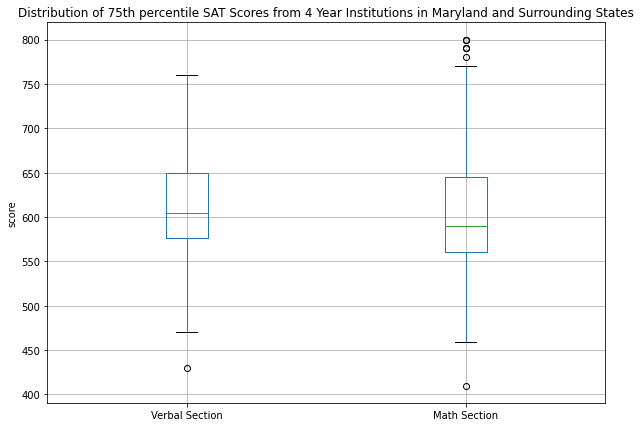

In [315]:
satbox = df_clean_offcampus.boxplot(column=['SATVR75', 'SATMT75'], figsize=(10,7))

satbox.set_ylabel('score')
satbox.set_xticklabels(['Verbal Section', 'Math Section'])
satbox.set_title('Distribution of 75th percentile SAT Scores from 4 Year Institutions in Maryland and Surrounding States')
satbox;

looking at the distribution there is a wide variance among both features. But I think that if we add the mean values here it won't be a big deal. The reason I am okay with populating these values with the mean is because it won't really change any outcome. Also as an above average student I should be looking at schools that are well above the median values shown here anyway. 

In [316]:
df_sat_na =  df_clean_offcampus[df_clean_offcampus['SATVR75'].isnull() & df_clean_offcampus['SATMT75'].isnull()]
df_clean_sat = df_clean_offcampus

satmt = round(df_clean_sat['SATMT75'].mean(),)
satvr = round(df_clean_sat['SATVR75'].mean())

df_clean_sat.loc[df_clean_sat['SATMT75'].isnull() , 'SATMT75'] = satmt
df_clean_sat.loc[df_clean_sat['SATVR75'].isnull() , 'SATVR75'] = satvr

df_clean_sat.isnull().sum()

INSTNM              0
CITY                0
STABBR              0
PREDDEG             0
LOCALE              0
ADM_RATE            0
SATVR75             0
SATMT75             0
UGDS                0
TUITIONFEE_IN       1
TUITIONFEE_OUT      1
C150_4              0
RET_FT4             0
C100_4              0
ICLEVEL             0
BOOKSUPPLY          1
ROOMBOARD_ON        7
OTHEREXPENSE_ON     7
ROOMBOARD_OFF       0
OTHEREXPENSE_OFF    0
dtype: int64

In fact there is only one outlier with tuition fees that has a null value. What is it?

In [317]:
df_clean_sat[df_clean_sat['TUITIONFEE_IN'].isnull()]

,INSTNM,CITY,STABBR,PREDDEG,LOCALE,ADM_RATE,SATVR75,SATMT75,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,C150_4,RET_FT4,C100_4,ICLEVEL,BOOKSUPPLY,ROOMBOARD_ON,OTHEREXPENSE_ON,ROOMBOARD_OFF,OTHEREXPENSE_OFF
1411,United States Naval Academy,Annapolis,MD,3,21.0,0.0833,710.0,750.0,4538.0,NaN,NaN,0.9204,0.974,0.8964,1,NaN,NaN,NaN,12986.0,750.0


I am reluctant to drop the Naval Academy, after all, it is a prestigious academic institution ranking among the best in the country. It would be a shame to drop it for the reason of all these null values. They all seem to be associated with cost.
A quick google search shows that There are [no fees](https://www.usna.edu/Admissions/Student-Life/General-Information-for-Midshipmen.php) at all.

>The Navy pays 100% of the tuition, room, and board, medical and dental care costs of Naval Academy midshipmen. (quoted directly from the website linked above)

this being the case I think it is fair to put 0 in for these values seeing as there are no fees whatsoever.

Also, the remaining 10 null values are in the on campus room and board and other expenses section. I think that there is a strong likelihood that they are commuter schools and do not offer on campus housing facilities. Based on this I think that it is okay to fill these values with zeroes. While it will affect the median and mean of these columns the bulk of the consideration weighs on the outsized tuition fees and less so on housing. Moreover the ultimate goal is to select a single university (you can't attend full time at multiple universities unless you're super-human, I'm not).



In [319]:
df_clean = df_clean_sat
df_clean.fillna(0, inplace= True)
df_clean

,INSTNM,CITY,STABBR,PREDDEG,LOCALE,ADM_RATE,SATVR75,SATMT75,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,C150_4,RET_FT4,C100_4,ICLEVEL,BOOKSUPPLY,ROOMBOARD_ON,OTHEREXPENSE_ON,ROOMBOARD_OFF,OTHEREXPENSE_OFF
600,Delaware State University,Dover,DE,3,13.0,0.5277,520.0,500.0,3932.0,8258.0,17294.0,0.4157,0.7045,0.2668,1,2000.0,11984.0,2450.0,13494.0,5888.0
601,University of Delaware,Newark,DE,3,21.0,0.7136,670.0,680.0,19047.0,14280.0,35710.0,0.8066,0.9118,0.7185,1,1000.0,13208.0,1800.0,13208.0,1800.0
602,Goldey-Beacom College,Wilmington,DE,3,21.0,0.5668,615.0,607.0,726.0,24780.0,24780.0,0.5806,0.7027,0.4944,1,1032.0,8482.0,6506.0,7049.0,6506.0
604,Wesley College,Dover,DE,3,13.0,0.6139,540.0,520.0,997.0,26756.0,26756.0,0.2874,0.5357,0.1682,1,2000.0,11864.0,2400.0,11864.0,2400.0
606,American University,Washington,DC,3,11.0,0.3608,700.0,690.0,7659.0,49889.0,49889.0,0.7882,0.8670,0.7525,1,800.0,16096.0,909.0,16096.0,909.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4874,Averett University-Non-Traditional Programs,Danville,VA,3,32.0,0.2364,615.0,607.0,218.0,11820.0,11820.0,1.0000,0.5000,1.0000,1,1000.0,0.0,0.0,4590.0,3198.0
4952,Patrick Henry College,Purcellville,VA,3,31.0,0.8560,740.0,670.0,292.0,27922.0,27922.0,0.6437,0.8977,0.5747,1,500.0,10728.0,500.0,9000.0,400.0
5246,Fairfax University of America,Fairfax,VA,3,21.0,0.9167,615.0,607.0,34.0,10328.0,10328.0,0.1538,1.0000,0.0000,1,1200.0,0.0,0.0,6328.0,5611.0
5608,DeVry University-Pennsylvania,Ft. Washington,PA,3,21.0,0.9000,615.0,607.0,128.0,18069.0,18069.0,0.1587,1.0000,0.1481,1,400.0,0.0,0.0,14084.0,6744.0


Text(0.5, 1.0, 'Number of Colleges per State')

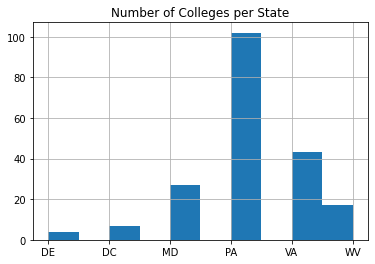

In [323]:
state_hist = df_clean['STABBR'].hist();
state_hist.set_title('Number of Colleges per State')

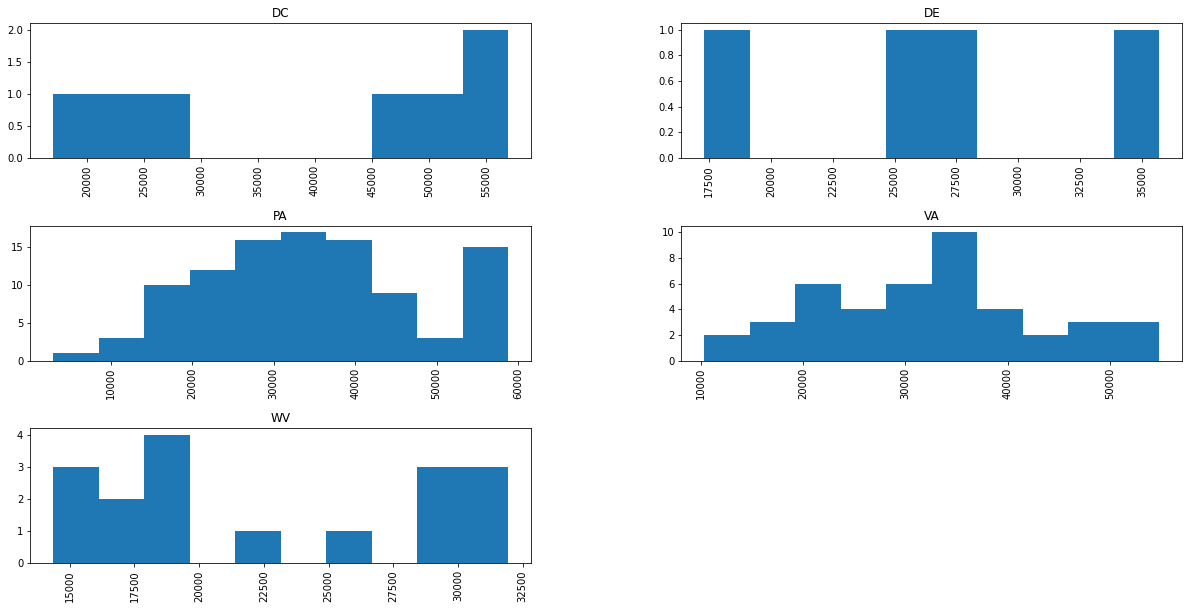

In [367]:
df_clean[df_clean['STABBR'] != 'MD'].hist(column='TUITIONFEE_OUT', by='STABBR', figsize=(20,10));

Out of state fees in general are highest in all other states except West Virginia. Let's look at the instate fees for Maryland.

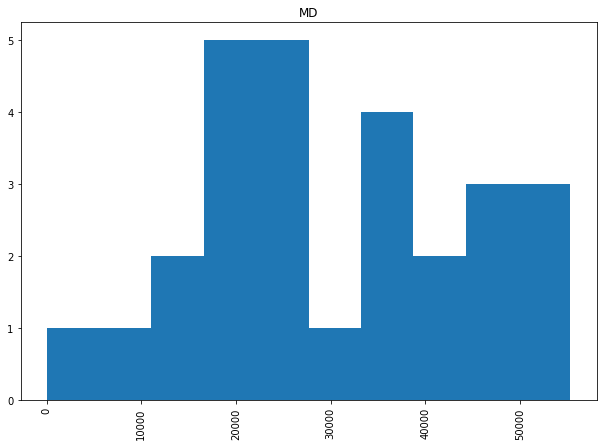

In [369]:
df_clean[df_clean['STABBR'] == 'MD'].hist(column='TUITIONFEE_OUT', by='STABBR', figsize=(10,7));

It looks like it is better to stay instate when prices look so much more lucrative here. There are many reasons to pick a school to attend but dollar for dollar, it looks like the conventional wisdom holds and that it's cheaper to stay instate. Also if you can continue to live at home you can save tens of thousands of dollars per year. So if money is a main concern. Stay in Maryland.